In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/Train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

Found 915 images belonging to 2 classes.


In [ ]:
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/Train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 227 images belonging to 2 classes.


In [ ]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')


                  ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()
model:"sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 171s 6s/step - accuracy: 0.7085 - loss: 0.6084 - val_accuracy: 0.7004 - val_loss: 0.5990
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.7952 - loss: 0.4156 - val_accuracy: 0.7621 - val_loss: 0.4388
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.8637 - loss: 0.3120 - val_accuracy: 0.8238 - val_loss: 0.3609
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.9428 - loss: 0.1787 - val_accuracy: 0.8767 - val_loss: 0.2739
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 124s 4s/step - accuracy: 0.9672 - loss: 0.1011 - val_accuracy: 0.8855 - val_loss: 0.2606


In [ ]:
model.save('/content/drive/MyDrive/brain_tumor_dataset/ragul.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/brain_tumor_dataset/ragul.h5'
)
print("Model loaded")

Model loaded


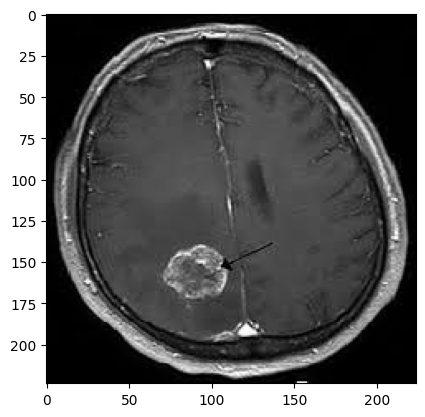

In [ ]:
#test and load
test_image_path="/content/drive/MyDrive/bt2.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [ ]:
#preprocess the image
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array/=255.

In [ ]:
#make prediction
prediction=model.predict(img_array)
#print the prediction
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
[[0.98751277]]


In [ ]:
if prediction >=0.5:
  print("you have brain tumor")
else:
  print("you don't have brain tumor")

you have brain tumor
